In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, GRU, LSTM, Bidirectional
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [66]:
data = pd.read_csv('datasets/GlaucomaM.csv')

In [67]:
data.head()

,ag,at,as,an,ai,eag,eat,eas,ean,eai,abrg,abrt,abrs,abrn,abri,hic,mhcg,mhct,mhcs,mhcn,mhci,phcg,phct,phcs,phcn,phci,hvc,vbsg,vbst,vbss,vbsn,vbsi,vasg,vast,vass,vasn,vasi,vbrg,vbrt,vbrs,vbrn,vbri,varg,vart,vars,varn,vari,mdg,mdt,mds,mdn,mdi,tmg,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,0.479,0.260,0.107,0.014,0.098,0.214,0.111,0.412,0.036,0.105,-0.022,-0.139,0.242,-0.053,0.010,-0.139,0.613,0.303,0.103,0.088,0.022,0.090,0.062,0.000,0.011,0.032,0.018,0.075,0.039,0.021,0.002,0.014,0.756,0.009,0.209,0.298,0.240,0.705,0.637,0.738,0.596,0.691,-0.236,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,1.090,0.377,0.257,0.212,0.245,0.382,0.140,0.338,0.104,0.080,0.109,-0.015,0.296,-0.015,-0.015,0.036,0.382,0.676,0.181,0.186,0.141,0.169,0.029,0.001,0.007,0.011,0.010,0.370,0.127,0.099,0.050,0.093,0.410,0.006,0.105,0.181,0.117,0.898,0.850,0.907,0.771,0.940,-0.211,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,0.465,0.209,0.112,0.041,0.103,0.195,0.062,0.356,0.045,-0.009,-0.048,-0.149,0.206,-0.092,-0.081,-0.149,0.557,0.300,0.084,0.088,0.046,0.082,0.036,0.002,0.004,0.016,0.013,0.081,0.034,0.019,0.007,0.021,0.565,0.014,0.132,0.243,0.177,0.687,0.643,0.689,0.684,0.700,-0.185,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,0.170,0.062,0.000,0.000,0.108,-0.030,-0.015,0.074,-0.084,-0.050,0.035,-0.182,-0.097,-0.125,-0.138,-0.182,0.373,0.048,0.011,0.000,0.000,0.036,0.070,0.005,0.030,0.033,0.002,0.005,0.001,0.000,0.000,0.004,0.380,0.032,0.147,0.151,0.050,0.207,0.171,0.022,0.046,0.221,-0.148,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,1.800,0.431,0.494,0.601,0.274,0.383,0.089,0.233,0.145,0.023,0.007,-0.131,0.163,0.055,-0.131,-0.115,0.405,0.889,0.151,0.253,0.330,0.155,0.020,0.001,0.004,0.008,0.007,0.532,0.103,0.173,0.181,0.075,0.228,0.011,0.026,0.105,0.087,0.721,0.638,0.730,0.730,0.640,-0.052,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal


In [68]:
print(data["Class"].value_counts())

Class
normal      98
glaucoma    98
Name: count, dtype: int64


In [69]:
y = data['Class'].apply(lambda x: 0 if x == 'normal' else 1).to_numpy()
x = data.drop(['Class'], axis=1).to_numpy()

In [70]:
x.shape, y.shape

((196, 62), (196,))

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## GRU

In [72]:
model = Sequential()
model.add(GRU(62, return_sequences=True, input_shape=(62, 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 62, 62)            12090     
                                                                 
 dropout_21 (Dropout)        (None, 62, 62)            0         
                                                                 
 gru_7 (GRU)                 (None, 62, 50)            17100     
                                                                 
 dropout_22 (Dropout)        (None, 62, 50)            0         
                                                                 
 gru_8 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [73]:
model.fit(x_train, y_train, epochs=15, batch_size=784, validation_data=(x_test, y_test))

Epoch 1/15


1/1 [==============================] - 2s 2s/step - loss: 0.6924 - accuracy: 0.4808 - val_loss: 0.6902 - val_accuracy: 0.4750
Epoch 2/15
1/1 [==============================] - 0s 132ms/step - loss: 0.6904 - accuracy: 0.5128 - val_loss: 0.6884 - val_accuracy: 0.4750
Epoch 3/15
1/1 [==============================] - 0s 126ms/step - loss: 0.6901 - accuracy: 0.5064 - val_loss: 0.6862 - val_accuracy: 0.4750
Epoch 4/15
1/1 [==============================] - 0s 128ms/step - loss: 0.6885 - accuracy: 0.5064 - val_loss: 0.6836 - val_accuracy: 0.4750
Epoch 5/15
1/1 [==============================] - 0s 119ms/step - loss: 0.6871 - accuracy: 0.5128 - val_loss: 0.6805 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 121ms/step - loss: 0.6857 - accuracy: 0.5321 - val_loss: 0.6769 - val_accuracy: 0.5250
Epoch 7/15
1/1 [==============================] - 0s 118ms/step - loss: 0.6840 - accuracy: 0.6026 - val_loss: 0.6726 - val_accuracy: 0.5750
Epoch 8/15
1/1 [==================

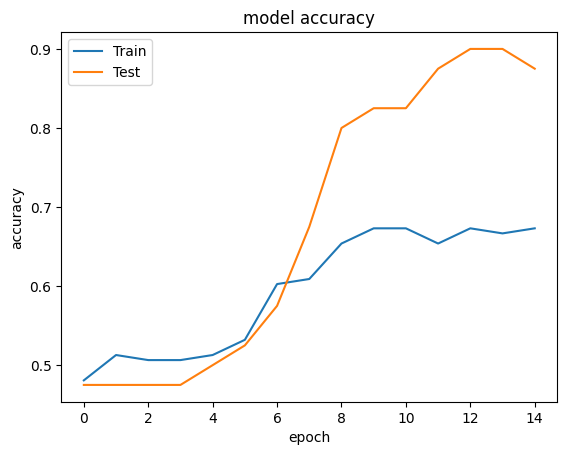

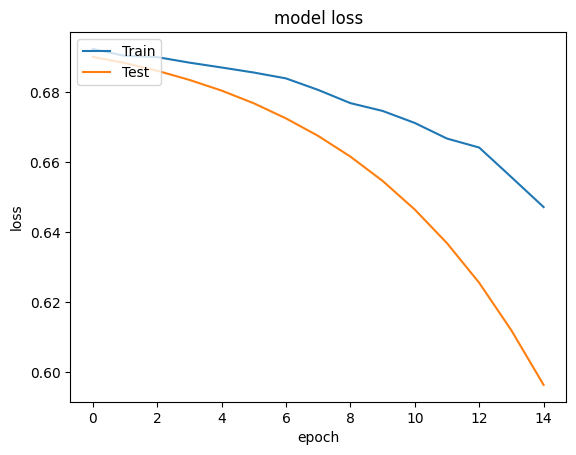

In [74]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
print("Train Accuracy: ", model.evaluate(x_train, y_train)[1])
print("Test Accuracy: ", model.evaluate(x_test, y_test)[1])

5/5 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.6410
Train Accuracy:  0.6410256624221802
2/2 [==============================] - 0s 6ms/step - loss: 0.5964 - accuracy: 0.8750
Test Accuracy:  0.875


In [76]:
y_hat = model.predict(x_test)
y_hat = np.round(y_hat).flatten()
gru_acc = accuracy_score(y_test, y_hat)

2/2 [==============================] - 0s 7ms/step


In [77]:
confusion_matrix(y_test, y_hat)

array([[17,  4],
       [ 1, 18]])

## LSTM

In [78]:
model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=(62, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 62, 62)            15872     
                                                                 
 dropout_24 (Dropout)        (None, 62, 62)            0         
                                                                 
 lstm_16 (LSTM)              (None, 62, 50)            22600     
                                                                 
 dropout_25 (Dropout)        (None, 62, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [79]:
model.fit(x_train, y_train, epochs=15, batch_size=784, validation_data=(x_test, y_test))

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.6935 - accuracy: 0.5385 - val_loss: 0.6912 - val_accuracy: 0.4750
Epoch 2/15
1/1 [==============================] - 0s 128ms/step - loss: 0.6916 - accuracy: 0.5064 - val_loss: 0.6897 - val_accuracy: 0.4750
Epoch 3/15
1/1 [==============================] - 0s 147ms/step - loss: 0.6891 - accuracy: 0.5064 - val_loss: 0.6881 - val_accuracy: 0.4750
Epoch 4/15
1/1 [==============================] - 0s 141ms/step - loss: 0.6890 - accuracy: 0.5064 - val_loss: 0.6862 - val_accuracy: 0.4750
Epoch 5/15
1/1 [==============================] - 0s 139ms/step - loss: 0.6867 - accuracy: 0.5064 - val_loss: 0.6838 - val_accuracy: 0.4750
Epoch 6/15
1/1 [==============================] - 0s 144ms/step - loss: 0.6856 - accuracy: 0.5064 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 149ms/step - loss: 0.6841 - accuracy: 0.5064 - val_loss: 0.6772 - val_accuracy: 0.5250
Epoch 8/15
1/1 [=======

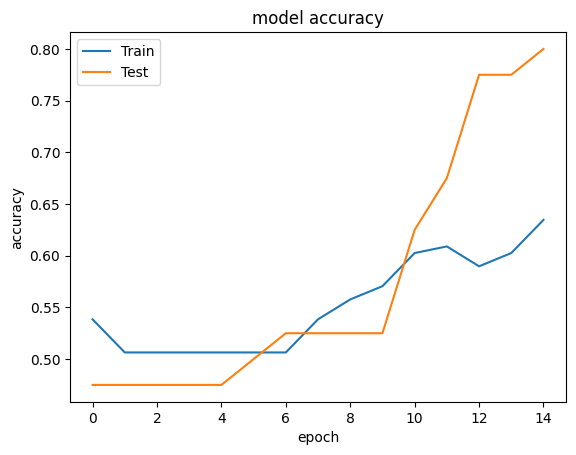

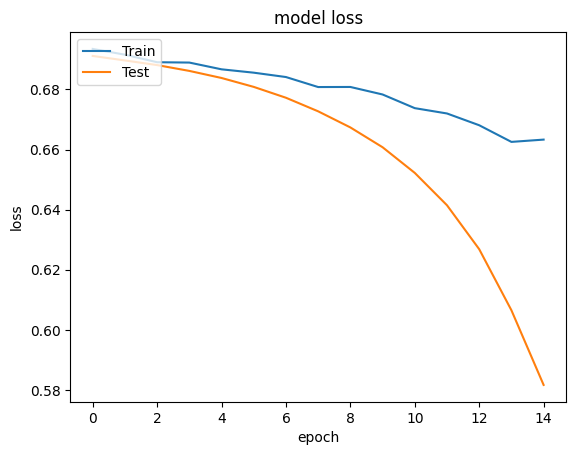

In [80]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [81]:
print("Train Accuracy: ", model.evaluate(x_train, y_train)[1])
print("Test Accuracy: ", model.evaluate(x_test, y_test)[1])

5/5 [==============================] - 0s 9ms/step - loss: 0.6512 - accuracy: 0.6346
Train Accuracy:  0.6346153616905212
2/2 [==============================] - 0s 6ms/step - loss: 0.5817 - accuracy: 0.8000
Test Accuracy:  0.800000011920929


In [82]:
y_hat = model.predict(x_test)
y_hat = np.round(y_hat).flatten()

lstm_acc = accuracy_score(y_test, y_hat)

2/2 [==============================] - 0s 7ms/step


In [83]:
confusion_matrix(y_test, y_hat)

array([[17,  4],
       [ 4, 15]])

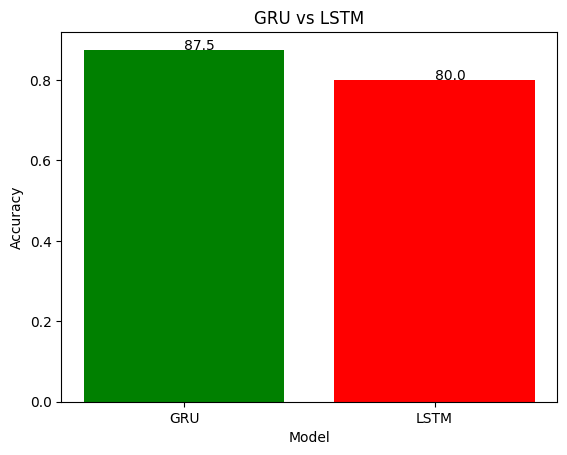

In [93]:
plt.bar(['GRU', 'LSTM'], [gru_acc, lstm_acc], color=['green', 'red'])
plt.text(0, gru_acc, str(round(gru_acc*100, 3)))
plt.text(1, lstm_acc, str(round(lstm_acc*100, 3)))
plt.title('GRU vs LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()